* Student name: Spencer Hadel
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Business Problem:

TENTATIVE:

A new real estate company that would like to use the data on past house sales to inform their decisions on how to properly price homes for prospective sellers and buyers in the area. They would like to look at the effect of square footage, numbers of bedrooms and bathrooms, waterfront views, recent renovations, and possibly location to inform their decisions on what the appropriate market value of a home will be. 

### Import Modules

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

### Import Prepared Data from kc_data_cleaning.ipynb

We have already cleaned the King County Housing Data in the kc_data_cleaning notebook:

[Data Cleaning Notebook!](./kc_data_cleaning)

We only need the cleaned_df dataframe from it, imported below:

In [2]:
df = pd.read_csv('cleaned.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21534 non-null  float64
 1   bedrooms        21534 non-null  int64  
 2   bathrooms       21534 non-null  float64
 3   sqft_living     21534 non-null  int64  
 4   sqft_lot        21534 non-null  int64  
 5   floors          21534 non-null  float64
 6   waterfront      21534 non-null  object 
 7   view            21534 non-null  object 
 8   condition       21534 non-null  object 
 9   grade           21534 non-null  object 
 10  yr_built        21534 non-null  int64  
 11  renovated_2000  21534 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


### Identifying Categorical Data

We need to find out which of the features contain categorical data. It is important to identify this because we want our model to be trained on normalized numerical values, not human concepts like condition scores. The most obvious categorical variables above are the ones where the dtype is an object. However, there are ints and floats that also pertain to categorical data, such as the number of bedrooms. 

We don't want our model predicting that a house's value will go up with the addition of 0.33 bedrooms, so we need to break down features like this into dummy variables. While we can look at the features and use common sense to identify categoricals, visualizing the data can also help with this, as seen below.

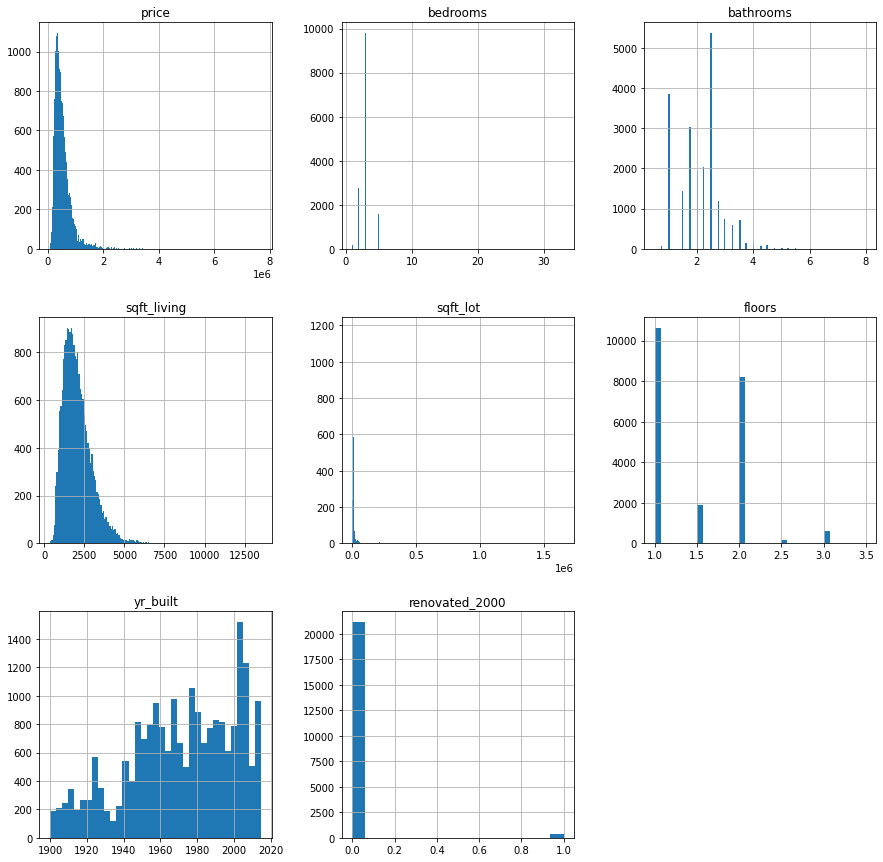

In [49]:
df.hist(figsize=[15,15], bins='auto');

Any feature that shows seperate individual columns of data clearly indicates that it is categorical. We create a new subset of the data composed of these features and the features that have a dtype of object.

In [52]:
categorical_df = df[['bedrooms', 'bathrooms', 'floors', 'renovated_2000', 'grade',
        'condition', 'view', 'waterfront']]

#### One-Hot Encoding Categoricals with Dummy Variables

We need to use one-hot encoding to split these features into data useable by our model. We create dummy variables for each potential variable of the categorical data.

In [53]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             21534 non-null  int64  
 1   bathrooms            21534 non-null  float64
 2   floors               21534 non-null  float64
 3   renovated_2000       21534 non-null  int64  
 4   grade_11 Excellent   21534 non-null  uint8  
 5   grade_12 Luxury      21534 non-null  uint8  
 6   grade_13 Mansion     21534 non-null  uint8  
 7   grade_3 Poor         21534 non-null  uint8  
 8   grade_4 Low          21534 non-null  uint8  
 9   grade_5 Fair         21534 non-null  uint8  
 10  grade_6 Low Average  21534 non-null  uint8  
 11  grade_7 Average      21534 non-null  uint8  
 12  grade_8 Good         21534 non-null  uint8  
 13  grade_9 Better       21534 non-null  uint8  
 14  condition_Fair       21534 non-null  uint8  
 15  condition_Good       21534 non-null 

We can see that every potential outcome for each of the categorical features has been successfully split into unique dummy variables.

### Continuous Data

The remaining features are continuous numerical data. 

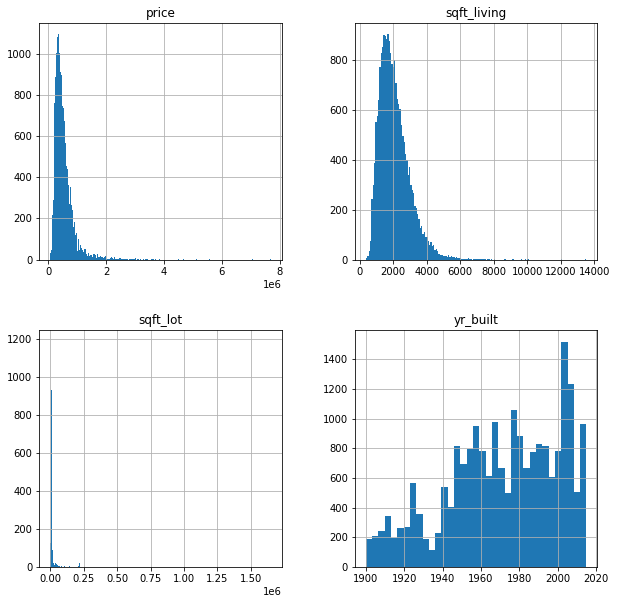

In [39]:
continuous_df = df[['price','sqft_living','sqft_lot', 'yr_built']]

continuous_df.hist(figsize=[10,10], bins='auto');

### Normalizing Data

Data of this type needs to be normalized so that each feature can be properly compared on the same scale by our model.

In [1]:
def normalize(series):
    return (series - series.mean())/series.std()
#normalize data

## Split Train and Test Data

Now that we have a complete preprocessed dataset, we need to split the data into train and test datasets. 

In [ ]:
#split data

In [13]:
#ols

In [15]:
#correlation heatmap